In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay, mean_squared_error
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.tree import plot_tree

In [2]:
df = pd.read_csv('data/train.csv')
df.head()
df = df.drop(columns=['id'])

In [3]:
df.dtypes

carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
x          float64
y          float64
z          float64
price      float64
dtype: object

In [4]:
df.isna().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

In [5]:
df.cut.unique()

array(['Premium', 'Good', 'Very Good', 'Ideal', 'Fair'], dtype=object)

In [6]:
dic_para_cut = { "Ideal":5,
                "Premium": 3,
                "Very Good": 3,
                "Good": 2,
                "Fair":1,
}

In [7]:
df.cut = df.cut.map(dic_para_cut)

In [8]:
df.color.unique()

array(['G', 'H', 'J', 'F', 'E', 'I', 'D'], dtype=object)

In [9]:
dic_para_color = { "G":4,
                "H": 3,
                "J": 1,
                "F": 5,
                "E":6,
                "I":2,
                "D":7,
}

In [10]:
df.color = df.color.map(dic_para_color)

In [11]:
df.clarity.unique()

array(['VS1', 'VS2', 'SI2', 'IF', 'SI1', 'VVS2', 'VVS1', 'I1'],
      dtype=object)

In [12]:
dic_para_clarity = { "VS1":5,
                "VS2": 4,
                "SI2": 2,
                "IF": 8,
                "SI1":3,
                "VVS2":6,
                "VVS1":7,
                "I1": 1,
}

In [13]:
df.clarity = df.clarity.map(dic_para_clarity)

In [14]:
df.dtypes

carat      float64
cut          int64
color        int64
clarity      int64
depth      float64
table      float64
x          float64
y          float64
z          float64
price      float64
dtype: object

In [15]:
df.corr()

,carat,cut,color,clarity,depth,table,x,y,z,price
carat,1.000000,-0.173104,-0.295110,-0.353316,0.029747,0.182453,0.974714,0.944353,0.948460,0.920292
cut,-0.173104,1.000000,0.036812,0.218984,-0.128981,-0.540920,-0.168972,-0.156802,-0.176649,-0.121421
color,-0.295110,0.036812,1.000000,-0.023353,-0.048786,-0.028571,-0.273433,-0.264744,-0.270077,-0.158279
clarity,-0.353316,0.218984,-0.023353,1.000000,-0.064487,-0.164790,-0.372429,-0.356431,-0.365391,-0.214705
depth,0.029747,-0.128981,-0.048786,-0.064487,1.000000,-0.291668,-0.023705,-0.028183,0.095489,0.003437
table,0.182453,-0.540920,-0.028571,-0.164790,-0.291668,1.000000,0.197420,0.184191,0.152496,0.159969
x,0.974714,-0.168972,-0.273433,-0.372429,-0.023705,0.197420,1.000000,0.967309,0.966396,0.957815
y,0.944353,-0.156802,-0.264744,-0.356431,-0.028183,0.184191,0.967309,1.000000,0.941970,0.928896
z,0.948460,-0.176649,-0.270077,-0.365391,0.095489,0.152496,0.966396,0.941970,1.000000,0.930774
price,0.920292,-0.121421,-0.158279,-0.214705,0.003437,0.159969,0.957815,0.928896,0.930774,1.000000


<AxesSubplot:>

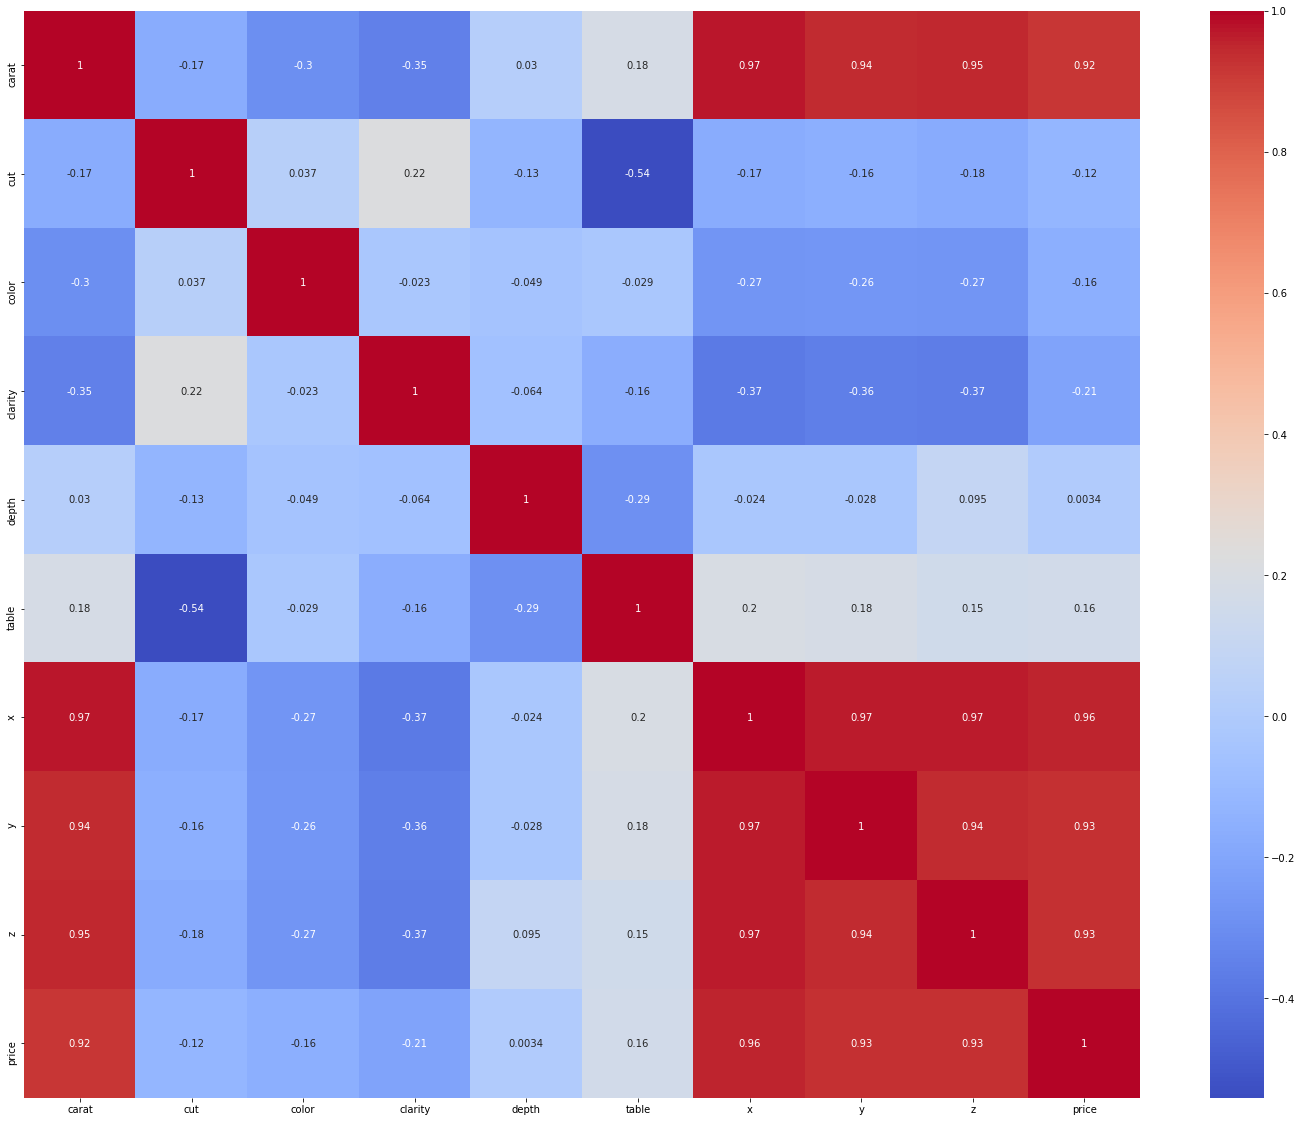

In [16]:
fig = plt.figure(figsize=(25,20))
sns.heatmap(df.corr(), annot = True, cmap = "coolwarm")

In [17]:
dff = df.drop(columns=['price'])

<AxesSubplot:>

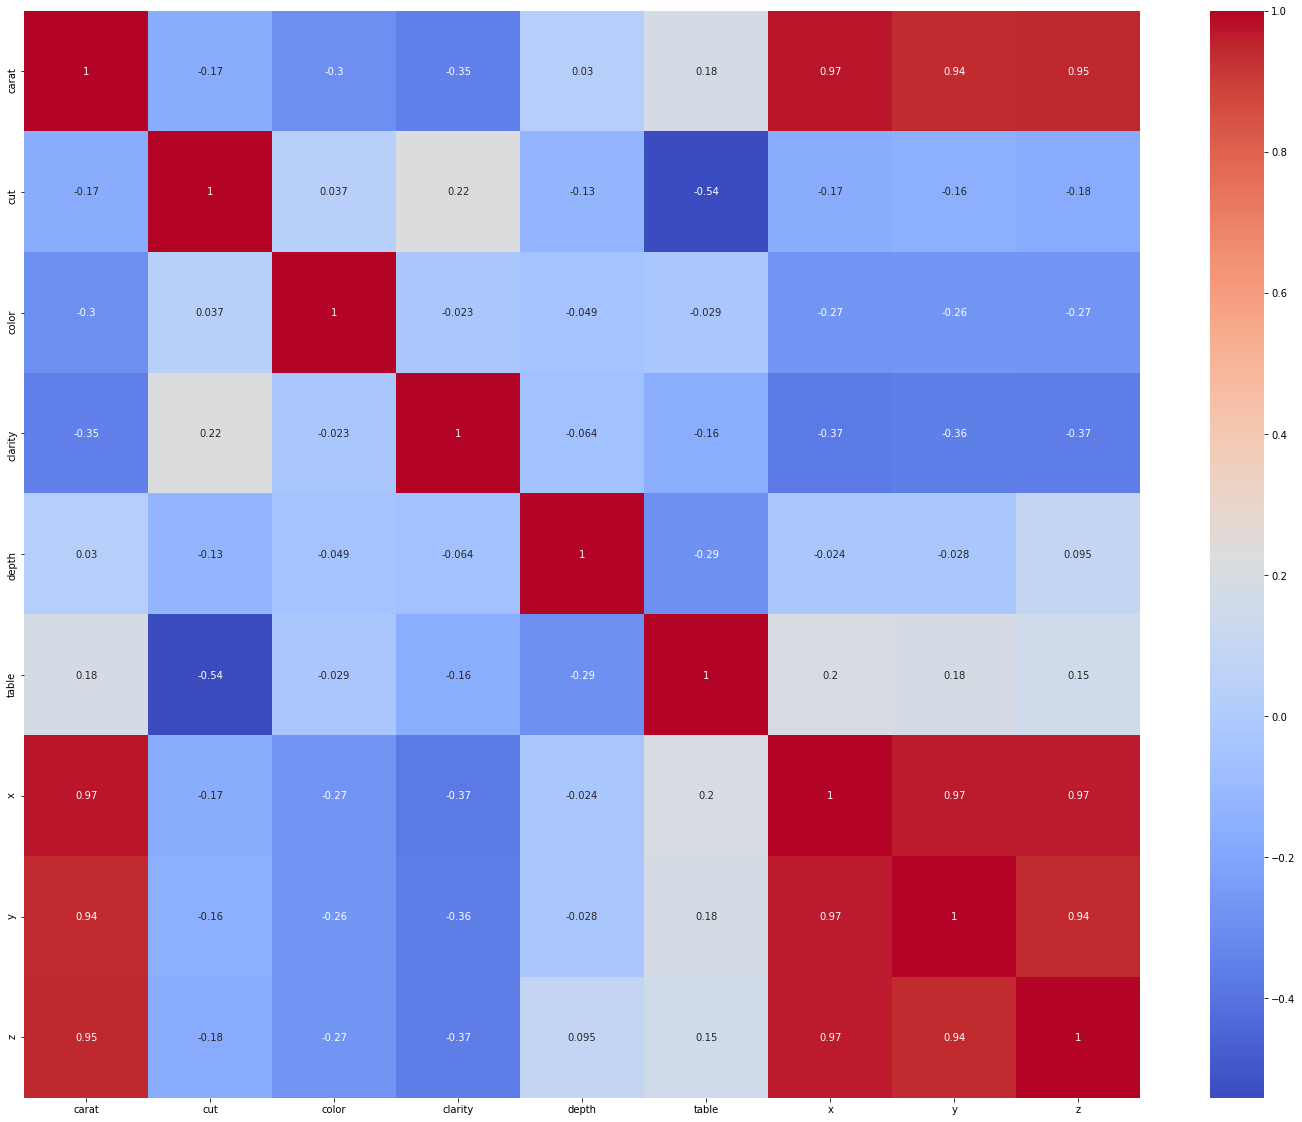

In [18]:
fig = plt.figure(figsize=(25,20))
sns.heatmap(dff.corr(), annot = True, cmap = "coolwarm")

In [19]:
dff.head()

,carat,cut,color,clarity,depth,table,x,y,z
0,1.01,3,4,5,62.7,58.0,6.36,6.31,3.97
1,0.60,2,4,4,64.3,57.0,5.31,5.38,3.43
2,1.60,3,3,2,59.4,59.0,7.55,7.60,4.50
3,0.30,3,1,5,63.5,58.0,4.27,4.24,2.70
4,1.00,3,5,2,62.8,57.0,6.37,6.44,4.02


In [20]:
dff.depth.unique()

array([62.7, 64.3, 59.4, 63.5, 62.8, 61.9, 60.3, 59.9, 60.8, 61.7, 57.9,
       62.1, 61.8, 62.2, 59.2, 61.2, 63.3, 63. , 62.5, 60.5, 63.4, 61.6,
       59.7, 62.4, 60. , 59.8, 64.9, 62.9, 60.7, 58.4, 63.6, 61.4, 62.6,
       61.5, 60.4, 61. , 64.2, 62.3, 63.1, 68.7, 62. , 64.7, 61.1, 65.7,
       60.9, 61.3, 64.4, 60.6, 66.1, 63.2, 65.2, 64.8, 65.1, 58.9, 60.2,
       57.4, 63.7, 60.1, 64.1, 56.7, 64.6, 57.6, 64.5, 59.5, 63.9, 65.8,
       58.5, 56.3, 58. , 58.6, 55.9, 55.2, 58.8, 63.8, 59.1, 59.3, 59. ,
       59.6, 56.4, 57.3, 65.9, 57.8, 58.1, 64. , 65. , 65.3, 58.2, 65.4,
       58.3, 57. , 65.5, 66.3, 65.6, 58.7, 52.2, 68.6, 57.7, 68.4, 67.6,
       57.2, 57.1, 67. , 57.5, 56.1, 67.2, 54.7, 70.6, 66.5, 54.2, 66. ,
       56.9, 66.9, 68.2, 66.4, 68.3, 66.6, 66.8, 56.2, 55.5, 56.6, 67.3,
       67.5, 67.1, 69. , 68.1, 56.8, 53. , 55.4, 68.5, 67.9, 72.2, 69.7,
       72.9, 55.8, 66.2, 56.5, 50.8, 69.6, 68.9, 69.8, 67.7, 53.2, 66.7,
       54.3, 68. , 51. , 69.3, 55.3, 68.8, 73.6, 55

In [21]:
from sklearn.preprocessing import StandardScaler

In [22]:
scaler = StandardScaler()

In [23]:
from sklearn.preprocessing import MinMaxScaler

In [24]:
min_max = MinMaxScaler()

In [25]:
dff.head()

,carat,cut,color,clarity,depth,table,x,y,z
0,1.01,3,4,5,62.7,58.0,6.36,6.31,3.97
1,0.60,2,4,4,64.3,57.0,5.31,5.38,3.43
2,1.60,3,3,2,59.4,59.0,7.55,7.60,4.50
3,0.30,3,1,5,63.5,58.0,4.27,4.24,2.70
4,1.00,3,5,2,62.8,57.0,6.37,6.44,4.02


In [33]:
dff.to_csv('data/features5clean.csv', index=False)

### Cleaning test

In [34]:
dftest = pd.read_csv('data/test.csv')
dftest = dftest.drop(columns=['id'])
dftest.head()

,carat,cut,color,clarity,depth,table,x,y,z
0,2.01,Ideal,H,SI1,61.9,57.0,8.14,8.05,5.01
1,0.49,Good,D,VS1,57.5,60.0,5.18,5.25,3.00
2,1.03,Premium,F,SI1,58.6,62.0,6.65,6.60,3.88
3,0.90,Very Good,E,SI1,63.0,56.0,6.11,6.15,3.86
4,0.59,Ideal,D,SI1,62.5,55.0,5.35,5.40,3.36


In [35]:
dic_para_cut = { "Ideal":5,
                "Premium": 3,
                "Very Good": 3,
                "Good": 2,
                "Fair":1,
}

In [36]:
dftest.cut = dftest.cut.map(dic_para_cut)

In [37]:
dftest.color.unique()

array(['H', 'D', 'F', 'E', 'G', 'I', 'J'], dtype=object)

In [38]:
dic_para_color = { "G":4,
                "H": 3,
                "J": 1,
                "F": 5,
                "E":6,
                "I":2,
                "D":7,
}

In [39]:
dftest.color = dftest.color.map(dic_para_color)

In [40]:
dftest.clarity.unique()

array(['SI1', 'VS1', 'VS2', 'SI2', 'VVS1', 'IF', 'VVS2', 'I1'],
      dtype=object)

In [41]:
dic_para_clarity = { "VS1":5,
                "VS2": 4,
                "SI2": 2,
                "IF": 8,
                "SI1":3,
                "VVS2":6,
                "VVS1":7,
                "I1": 1,
}

In [42]:
dftest.clarity = dftest.clarity.map(dic_para_clarity)

In [43]:
dftest

,carat,cut,color,clarity,depth,table,x,y,z
0,2.01,5,3,3,61.9,57.0,8.14,8.05,5.01
1,0.49,2,7,5,57.5,60.0,5.18,5.25,3.00
2,1.03,3,5,3,58.6,62.0,6.65,6.60,3.88
3,0.90,3,6,3,63.0,56.0,6.11,6.15,3.86
4,0.59,5,7,3,62.5,55.0,5.35,5.40,3.36
...,...,...,...,...,...,...,...,...,...
13480,0.41,2,5,1,63.8,57.0,4.72,4.69,3.00
13481,2.05,3,3,4,63.5,62.0,8.05,7.91,5.07
13482,2.22,3,2,4,60.5,59.0,8.41,8.37,5.08
13483,0.51,5,6,2,58.3,62.0,5.20,5.19,3.04


In [44]:
scaler = StandardScaler()

In [45]:
dftest.head()

,carat,cut,color,clarity,depth,table,x,y,z
0,2.01,5,3,3,61.9,57.0,8.14,8.05,5.01
1,0.49,2,7,5,57.5,60.0,5.18,5.25,3.00
2,1.03,3,5,3,58.6,62.0,6.65,6.60,3.88
3,0.90,3,6,3,63.0,56.0,6.11,6.15,3.86
4,0.59,5,7,3,62.5,55.0,5.35,5.40,3.36


In [46]:
dftest.to_csv('data/test5clean.csv', index=False)

In [47]:
dftest

,carat,cut,color,clarity,depth,table,x,y,z
0,2.01,5,3,3,61.9,57.0,8.14,8.05,5.01
1,0.49,2,7,5,57.5,60.0,5.18,5.25,3.00
2,1.03,3,5,3,58.6,62.0,6.65,6.60,3.88
3,0.90,3,6,3,63.0,56.0,6.11,6.15,3.86
4,0.59,5,7,3,62.5,55.0,5.35,5.40,3.36
...,...,...,...,...,...,...,...,...,...
13480,0.41,2,5,1,63.8,57.0,4.72,4.69,3.00
13481,2.05,3,3,4,63.5,62.0,8.05,7.91,5.07
13482,2.22,3,2,4,60.5,59.0,8.41,8.37,5.08
13483,0.51,5,6,2,58.3,62.0,5.20,5.19,3.04


### Probamos modelo

In [48]:
from sklearn.model_selection import train_test_split

In [49]:
X = dff
y = df.price

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2)

In [51]:
from sklearn.model_selection import GridSearchCV

In [52]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestClassifier

In [53]:
from xgboost import XGBRegressor

In [60]:
gs = GridSearchCV(
    estimator= GradientBoostingRegressor(),
    param_grid={
        "max_depth": [7,8,9,11],
        "min_samples_split": [6,7,8,9,10,11,12],
        "max_features": [6,7,8,9],
        "n_estimators": [100]
    },
    cv=5,
    verbose=3,
    scoring="neg_mean_squared_error",
    return_train_score=True
)

In [61]:
gs.fit(X_train, y_train)

Fitting 5 folds for each of 112 candidates, totalling 560 fits
[CV] max_depth=7, max_features=6, min_samples_split=6, n_estimators=100 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_depth=7, max_features=6, min_samples_split=6, n_estimators=100, score=(train=-0.005, test=-0.008), total=   3.0s
[CV] max_depth=7, max_features=6, min_samples_split=6, n_estimators=100 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.0s remaining:    0.0s


[CV]  max_depth=7, max_features=6, min_samples_split=6, n_estimators=100, score=(train=-0.006, test=-0.008), total=   3.0s
[CV] max_depth=7, max_features=6, min_samples_split=6, n_estimators=100 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    6.1s remaining:    0.0s


[CV]  max_depth=7, max_features=6, min_samples_split=6, n_estimators=100, score=(train=-0.005, test=-0.008), total=   3.0s
[CV] max_depth=7, max_features=6, min_samples_split=6, n_estimators=100 
[CV]  max_depth=7, max_features=6, min_samples_split=6, n_estimators=100, score=(train=-0.006, test=-0.008), total=   3.0s
[CV] max_depth=7, max_features=6, min_samples_split=6, n_estimators=100 
[CV]  max_depth=7, max_features=6, min_samples_split=6, n_estimators=100, score=(train=-0.005, test=-0.009), total=   3.0s
[CV] max_depth=7, max_features=6, min_samples_split=7, n_estimators=100 
[CV]  max_depth=7, max_features=6, min_samples_split=7, n_estimators=100, score=(train=-0.005, test=-0.008), total=   3.0s
[CV] max_depth=7, max_features=6, min_samples_split=7, n_estimators=100 
[CV]  max_depth=7, max_features=6, min_samples_split=7, n_estimators=100, score=(train=-0.006, test=-0.008), total=   3.0s
[CV] max_depth=7, max_features=6, min_samples_split=7, n_estimators=100 
[CV]  max_depth=7, m

[Parallel(n_jobs=1)]: Done 560 out of 560 | elapsed: 43.1min finished


GridSearchCV(cv=5, estimator=GradientBoostingRegressor(),
             param_grid={'max_depth': [7, 8, 9, 11],
                         'max_features': [6, 7, 8, 9],
                         'min_samples_split': [6, 7, 8, 9, 10, 11, 12],
                         'n_estimators': [100]},
             return_train_score=True, scoring='neg_mean_squared_error',
             verbose=3)

In [64]:
grid_search_results = pd.DataFrame(gs.cv_results_)
# we only keep some of the information
grid_search_results = grid_search_results[['param_max_depth', 'param_max_features', 'param_min_samples_split',
       'mean_test_score', 'mean_train_score']]

In [65]:
grid_search_results.sort_values("mean_test_score", ascending=False).head(10)

,param_max_depth,param_max_features,param_min_samples_split,mean_test_score,mean_train_score
63,9,7,6,-0.007769,-0.003232
75,9,8,11,-0.007805,-0.003365
59,9,6,9,-0.007810,-0.003399
47,8,8,11,-0.007816,-0.004416
35,8,7,6,-0.007818,-0.004327
57,9,6,7,-0.007819,-0.003343
61,9,6,11,-0.007825,-0.003442
39,8,7,10,-0.007826,-0.004424
64,9,7,7,-0.007828,-0.003261
49,8,9,6,-0.007829,-0.004251


In [72]:
best_boostalldf11 = gs.best_estimator_

In [73]:
best_boostalldf11

GradientBoostingRegressor(max_depth=9, max_features=6, min_samples_split=11)

In [74]:
import pickle

In [54]:
pickle.dump(best_boostalldf, open("best_boostalldf", "wb"))
#GradientBoostingRegressor(max_depth=9, max_features=6, min_samples_split=15)

In [75]:
pickle.dump(best_boostalldf11, open("best_boostalldf11", "wb"))